# Лабораторная работа №2

**Тема: "Гармоники"**

Работу выполнил

студент группы 5130901/20201

Нестеренко Сергей Андреевич

---

## Упражнение 2.1

В файле **chap02.ipynb** представлен обозреваются треугольный, прямоугольный, пилообразный сигналы, а также биения. Показано, как с ними можно работать, какие спектры они образуют и как звучат.

## Упражнение 2.2

Скачаем библиотеку ThinkDSP из официального репозитория. Импортируем её, а также NumPy.

In [3]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import thinkdsp
import numpy as np

Реализуем класс `SawtoothSignal`, расширяющий `Signal` и предоставляющий метод `evaluate` для оценки пилообразного сигнала.

In [6]:
class SawtoothSignal(thinkdsp.Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Создадим экземпляр класса и посчитаем его спектр. Также получим спектры аналогичных прямоугольного и треугольного сигналов.

In [21]:
sawtooth_spectrum = \
  SawtoothSignal().make_wave(duration=0.5, framerate=40000).make_spectrum()
square_spectrum = \
  thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000).make_spectrum()
triangle_spectrum = \
  thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000).make_spectrum()

Сравним спектр пилообразного сигнала со спектром прямоугольного сигнала.

Заметим, что спектр пилообразного сигнала спадает аналогично, но включает и четные, и нечетные гармоники, в отличие от прямоугольного, включающего только нечетные гармоники.

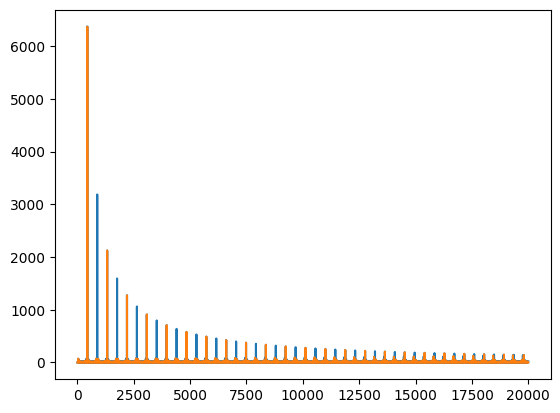

In [22]:
sawtooth_spectrum.plot()
square_spectrum.plot()

Теперь сравним спектр пилообразного сигнала со спектром треугольного сигнала.

Спектр треугольного сигнала спадает значительно быстрее, а также включает только нечетные гармоники.

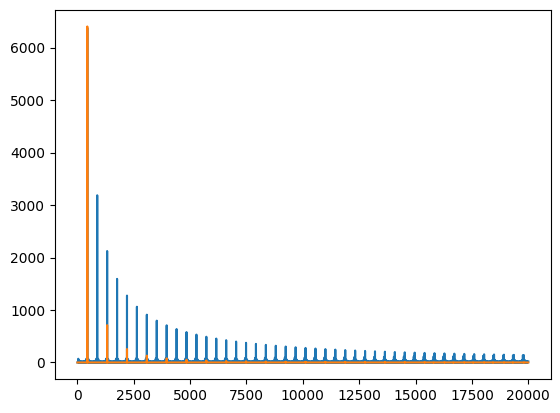

In [23]:
sawtooth_spectrum.plot()
triangle_spectrum.plot()

## Упражнение 2.3

Создадим прямоугольный сигнал с частотой 1100 Гц. На основе него создаим объект Wave с длительностью 0.5 секунд и выборками 10000 кадров в секунду.

In [25]:
square_signal: thinkdsp.SquareSignal = thinkdsp.SquareSignal(freq=1100)
square_wave: thinkdsp.Wave = square_signal.make_wave(duration=0.5, framerate=10000)

Построим спектр данного сигнала. Заметим, что из-за биений большинство гармоник "завернуты".

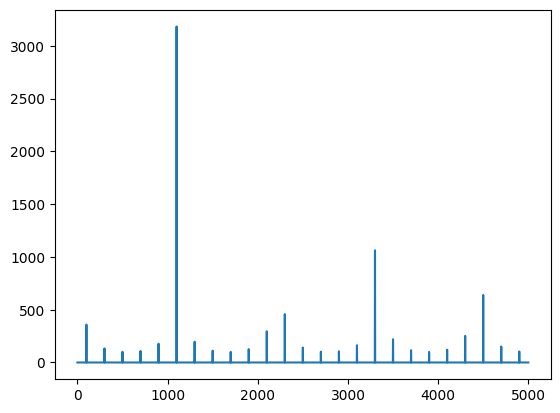

In [26]:
square_spectrum: thinkdsp.Spectrum = square_wave.make_spectrum()
square_spectrum.plot()

Прослушаем полученный сигнал в аудиоформате. Из-за возникших биений получился гудящий, режущий слух звук.

In [27]:
square_wave.make_audio()

## Упражнение 2.4

Создадим треугольный сигнал с частото 440 Гц и wave с длительностью 0.01 секунд.

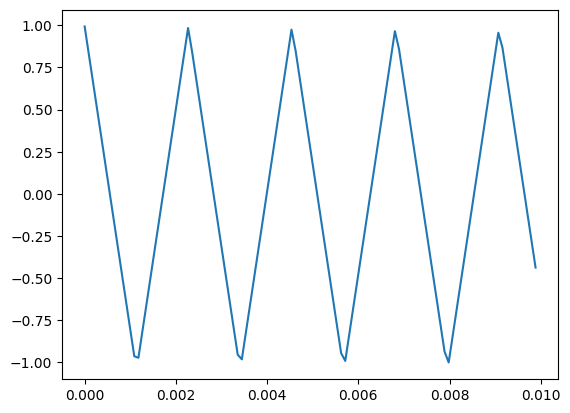

In [29]:
triangle_wave = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.01)
triangle_wave.plot()


На основе объекта Wave создадим спектр и распечатаем `Spectrum.hs[0]`. Получено комплексное число. Мнимая часть числа равна нулю, а действительная крайне мала (10^-14).

In [37]:
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.hs[0]

(1.0436096431476471e-14+0j)

Изменим значение нулевой компоненты на 100. Сравним графики сигналов (синий -- до, черный -- после). Заметим, что график сдвинулся вверх относительно исходного положения на 1. Следовательно, нулевая компонента спектра отвечает за вертикальный сдвиг волны.

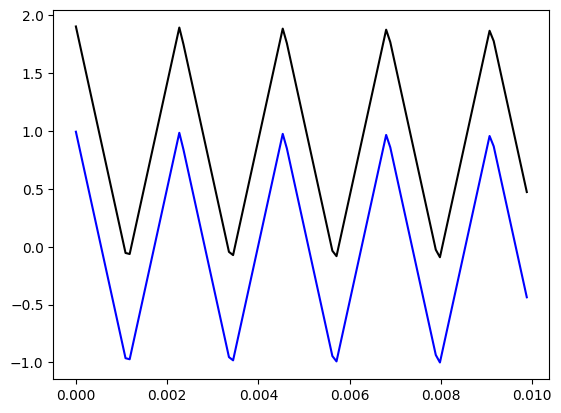

In [43]:
triangle_wave.plot(color='blue')

triangle_spectrum.hs[0] = 100
triangle_spectrum.make_wave().plot(color='black')

## Упражнение 2.5

Напишем функцию, принимающую `Spectrum` в качестве аргумента и изменяющую его делением каждого элемента `hs` на соответствующую частоту из `fs`.

In [69]:
def alter_spectrum(s: thinkdsp.Spectrum):
  s.hs[0] = 0
  for i in range(1, len(s.hs)):
    s.hs[i] /= s.fs[i]

Проверим эту функцию на прямоугольном, треугольном и пилообразном сигналах.

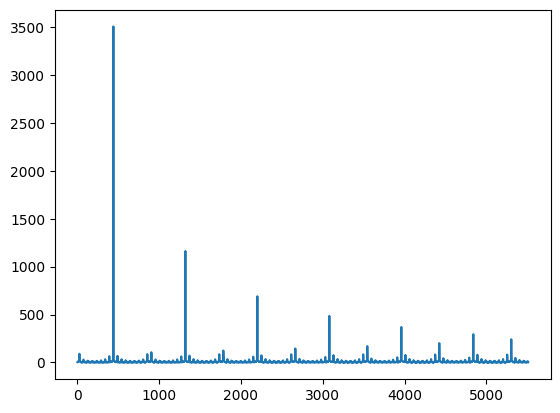

In [57]:
# Прямоугольный сигнал
sq_wave = thinkdsp.SquareSignal().make_wave(duration=0.5)
sq_spectrum = sq_wave.make_spectrum()
sq_spectrum.plot()
sq_wave.make_audio()
# Звук и спектр до обработки:

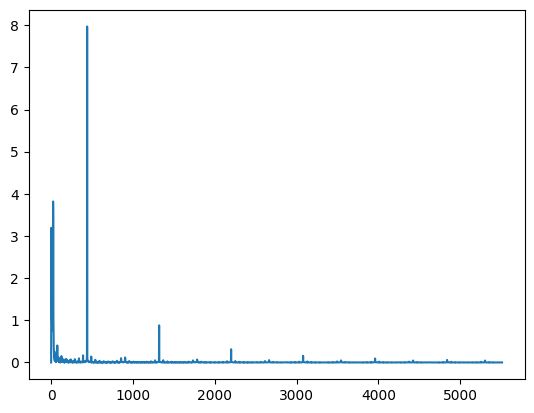

In [52]:
alter_spectrum(sq_spectrum)
sq_spectrum.plot()
sq_spectrum.make_wave().make_audio()
# Звук и спектр после обработки:

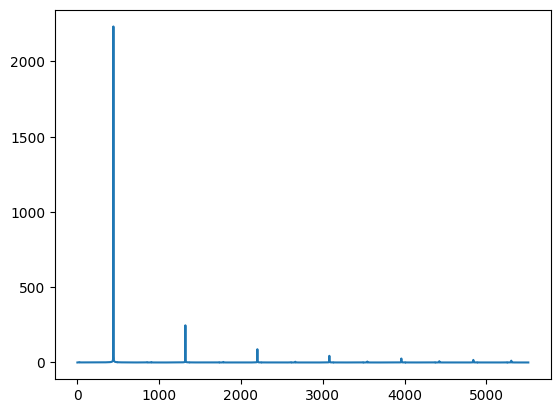

In [59]:
# Треугольный сигнал
tr_wave = thinkdsp.TriangleSignal().make_wave(duration=0.5)
tr_spectrum = tr_wave.make_spectrum()
tr_spectrum.plot()
tr_wave.make_audio()
# Звук и спектр до обработки:

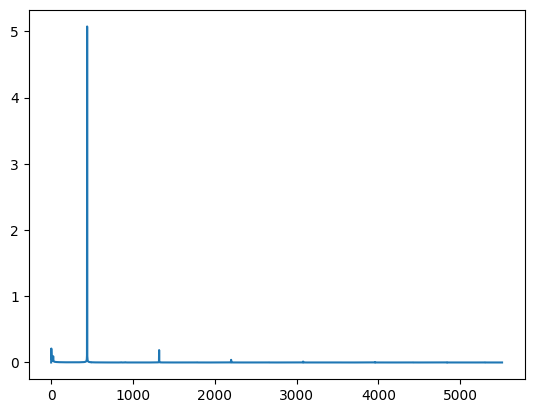

In [60]:
alter_spectrum(tr_spectrum)
tr_spectrum.plot()
tr_spectrum.make_wave().make_audio()
# Звук и спектр после обработки:

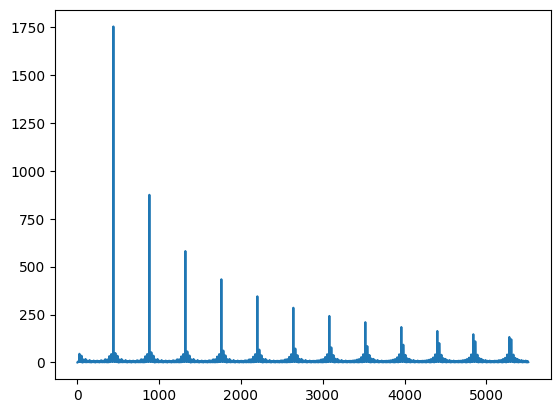

In [61]:
# Пилообразный сигнал
st_wave = thinkdsp.SawtoothSignal().make_wave(duration=0.5)
st_spectrum = st_wave.make_spectrum()
st_spectrum.plot()
st_wave.make_audio()
# Звук и спектр до обработки:

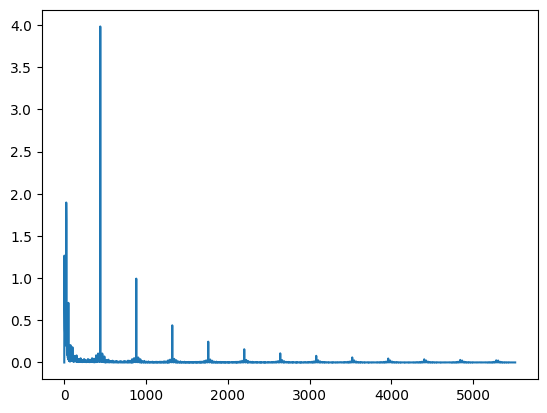

In [62]:
alter_spectrum(st_spectrum)
st_spectrum.plot()
st_spectrum.make_wave().make_audio()
# Звук и спектр после обработки:

Полученна функция преобразует входной сигнал таким образом, что его звучание становится ближе к синусоидальному сигналу.

## Упражнение 2.6

Чтобы получить сигнал, содержащий и четные, и нечетные гармоники, а также спадающий пропорционально $\left. 1 \middle/ f^2 \right. \\[1em]$, воспользуемся пилообразным сигналом. Он уже имеет необходимые гармоники, но спадает пропорционально $\left. 1 \middle/ f \right. \\[1em]$. Это можно изменить, применив созданную ранее функцию `alter_spectrum()`.

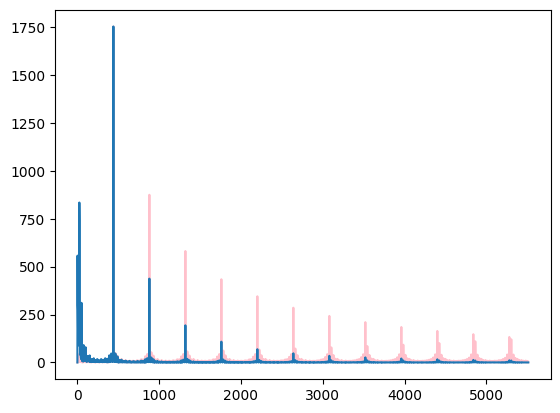

In [68]:
st = thinkdsp.SawtoothSignal(freq=440).make_wave(duration=0.5).make_spectrum()
st.plot(color='pink')
alter_spectrum(st)
st.scale(440)
st.plot()